# Multi layer perceptron

Perceptron could represent any circuit and logic, the biggest criticism was that it couldn’t represent the XOR gate, exclusive OR, where the gate only returns 1 if the inputs are different.This was proved almost a decade later by Minsky and Papert, in 1969[5] and highlights the fact that Perceptron, with only one neuron, can’t be applied to non-linear data.The Multilayer Perceptron was developed to tackle this limitation. It is a neural network where the mapping between inputs and output is non-linear.

A Multilayer Perceptron has input and output layers, and one or more hidden layers with many neurons stacked together. And while in the Perceptron the neuron must have an activation function that imposes a threshold, like ReLU or sigmoid, neurons in a Multilayer Perceptron can use any arbitrary activation function.

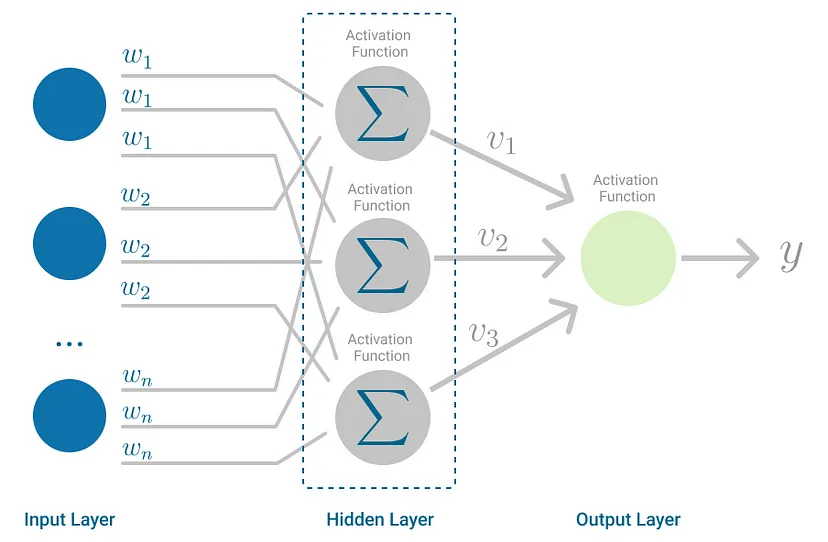

## Function
The core principle behind the functioning of a multilayer perceptron lies in backpropagation, a key algorithm used to train the network. During backpropagation, the network adjusts its weights and biases by propagating the error backwards from the output layer to the input layer. This iterative process fine-tunes the model’s parameters, enabling it to make more accurate predictions over time.

## How does backpropagation work in a multilayer perceptron?

Backpropagation is a supervised learning algorithm used to train the network by adjusting the weights of the connections between neurons. Here’s how it works:

Forward Pass: During the forward pass, input data is fed through the network, and the output is calculated based on the current weights and biases.
Error Calculation: The difference between the predicted output and the actual output is calculated using a loss function, such as mean squared error or cross-entropy loss.
Backward Pass: In the backward pass, the algorithm works by propagating the error backward through the network, starting from the output layer and moving towards the input layer. This is where the name “backpropagation” comes from.
Weight Update: As the error is propagated backward, the algorithm adjusts the weights of the connections between neurons to minimize the error. This is done using the gradient of the loss function with respect to the weights, calculated via the chain rule of calculus.
Repeat Until Convergence: The forward and backward passes are repeated for multiple iterations (epochs) until the network’s performance converges to a satisfactory level.

In [4]:
import numpy as np
import pandas as pd

In [58]:
# Load data
data=pd.read_csv('HR_comma_sep.csv')

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [56]:
data.shape

(14999, 10)

In [60]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['Departments']=le.fit_transform(data['sales'])
data.drop('sales',axis = 1 , inplace=True)

In [62]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Departments
0,0.38,0.53,2,157,3,0,1,0,1,7
1,0.80,0.86,5,262,6,0,1,0,2,7
2,0.11,0.88,7,272,4,0,1,0,2,7
3,0.72,0.87,5,223,5,0,1,0,1,7
4,0.37,0.52,2,159,3,0,1,0,1,7


In [118]:
# Spliting data into Feature and
X=data.drop('left', axis = 1)
y = data['left']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [120]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(100,5),
                    random_state=42,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 1.54518493
Iteration 2, loss = 0.58906563
Iteration 3, loss = 0.56768735
Iteration 4, loss = 0.54764051
Iteration 5, loss = 0.50085329
Iteration 6, loss = 0.42638472
Iteration 7, loss = 0.41881014
Iteration 8, loss = 0.36355979
Iteration 9, loss = 0.36349867
Iteration 10, loss = 0.35331283
Iteration 11, loss = 0.32808973
Iteration 12, loss = 0.31626414
Iteration 13, loss = 0.31246780
Iteration 14, loss = 0.32649830
Iteration 15, loss = 0.30318631
Iteration 16, loss = 0.30748870
Iteration 17, loss = 0.29479150
Iteration 18, loss = 0.31603026
Iteration 19, loss = 0.31590050
Iteration 20, loss = 0.28979447
Iteration 21, loss = 0.29792462
Iteration 22, loss = 0.30102780
Iteration 23, loss = 0.30251709
Iteration 24, loss = 0.30391129
Iteration 25, loss = 0.29726947
Iteration 26, loss = 0.29441415
Iteration 27, loss = 0.29006381
Iteration 28, loss = 0.29258416
Iteration 29, loss = 0.32359863
Iteration 30, loss = 0.28475508
Iteration 31, loss = 0.28575516
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 5), learning_rate_init=0.01,
              random_state=42, verbose=True)

In [122]:
clf.score(X_train,y_train)

0.9144680445756739

In [124]:
clf.score(X_test,y_test)

0.912

In [126]:
y_test_pred = clf.predict(X_test)

In [128]:
from sklearn.metrics import confusion_matrix

In [130]:
cm = confusion_matrix(y_test, y_test_pred)

In [132]:
import seaborn as sns

<Axes: >

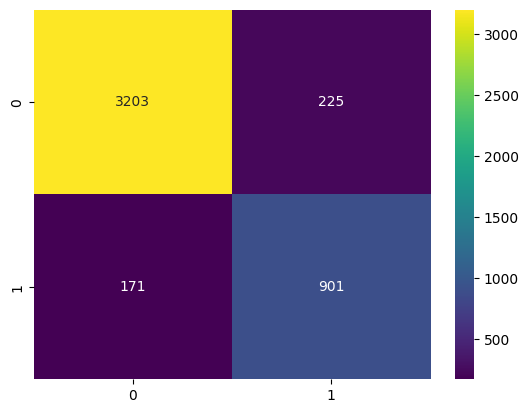

In [134]:
sns.heatmap(cm, annot = True, fmt='2g', cmap='viridis')